In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing datastets
titanic_data=pd.read_csv(r"C:\Users\User\Desktop\p3\Titanic.csv")
test_data=pd.read_csv(r"C:\Users\User\Desktop\p3\test.csv")

In [3]:
titanic_data.head

<bound method NDFrame.head of      passengerId  survived  pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  name     sex   age  sibsp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [4]:
titanic_data.describe

<bound method NDFrame.describe of      passengerId  survived  pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  name     sex   age  sibsp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [5]:
print("Missing values in the data values")
total = titanic_data.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_data.isnull().sum()/titanic_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
print(missing_data)

Missing values in the data values
             Total     %
cabin          687  77.1
age            177  19.9
embarked         2   0.2
fare             0   0.0
ticket           0   0.0
parch            0   0.0
sibsp            0   0.0
sex              0   0.0
name             0   0.0
pclass           0   0.0
survived         0   0.0
passengerId      0   0.0


### Q1) Find out the overall chance of survival for a Titanic passenger.

In [7]:
print("No. of passengers survived = ",titanic_data['survived'].value_counts()[1])
print("Passengers survival percentage = ",titanic_data['survived'].value_counts(normalize=True)[1]*100)

No. of passengers survived =  342
Passengers survival percentage =  38.38383838383838


### Q2) Find out the chance of survival for a Titanic passenger based on their sex and plot it.

Female passangers survived percentage =  74.20382165605095
Male passangers survived percentage =  18.890814558058924


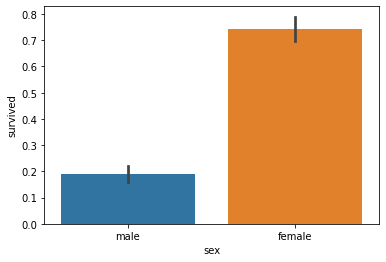

In [8]:
sns.barplot(x="sex", y="survived", data=titanic_data)
print("Female passangers survived percentage = ", titanic_data["survived"][titanic_data["sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Male passangers survived percentage = ", titanic_data["survived"][titanic_data["sex"] == 'male'].value_counts(normalize = True)[1]*100)

### Q3) Find out the chance of survival for a Titanic passenger by traveling class wise and plot it.

P_Class-1 passangers survived percentage =  62.96296296296296
P_Class-2 passangers survived percentage =  47.28260869565217
P_Class-3 passangers survived percentage =  24.236252545824847


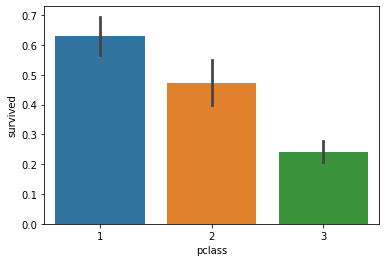

In [9]:
sns.barplot(x="pclass", y="survived", data=titanic_data)
print("P_Class-1 passangers survived percentage = ", titanic_data["survived"][titanic_data["pclass"] == 1].value_counts(normalize = True)[1]*100)
print("P_Class-2 passangers survived percentage = ", titanic_data["survived"][titanic_data["pclass"] == 2].value_counts(normalize = True)[1]*100)
print("P_Class-3 passangers survived percentage = ", titanic_data["survived"][titanic_data["pclass"] == 3].value_counts(normalize = True)[1]*100)

### Q4) Find out the average age for a Titanic passenger who survived by passenger class and sex. 

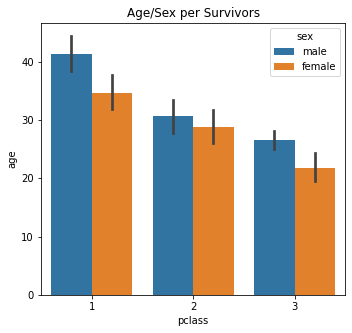

In [10]:
fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
plt.title('Age/Sex per Survivors')
sns.barplot(data=titanic_data, x='pclass',y='age',hue='sex')

In [11]:
meanAgeTrnMale = round(titanic_data[(titanic_data['sex'] == "male")]['age'].groupby(titanic_data['pclass']).mean(),2)
meanAgeTrnFeMale = round(titanic_data[(titanic_data['sex'] == "female")]['age'].groupby(titanic_data['pclass']).mean(),2)
print('Age MEAN per Sex')
print(pd.concat([meanAgeTrnMale, meanAgeTrnFeMale], axis = 1,keys= ['Male','Female']))

Age MEAN per Sex
         Male  Female
pclass               
1       41.28   34.61
2       30.74   28.72
3       26.51   21.75


### Q5) Find out the chance of survival for a Titanic passenger based on number of siblings the passenger had on the ship and plot it.

SibSp 0 Survivors percentage =  34.53947368421053
SibSp 1 Survivors percentage =  53.588516746411486
SibSp 2 Survivors percentage =  46.42857142857143


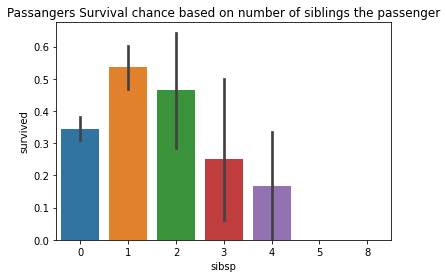

In [12]:
sns.barplot(x="sibsp", y="survived", data=titanic_data)
plt.title('Passangers Survival chance based on number of siblings the passenger')
print("SibSp 0 Survivors percentage = ", titanic_data["survived"][titanic_data["sibsp"] == 0].value_counts(normalize = True)[1]*100)
print("SibSp 1 Survivors percentage = ", titanic_data["survived"][titanic_data["sibsp"] == 1].value_counts(normalize = True)[1]*100)
print("SibSp 2 Survivors percentage = ", titanic_data["survived"][titanic_data["sibsp"] == 2].value_counts(normalize = True)[1]*100)

### Q6) Find out the chance of survival for a Titanic passenger based on number of parents/children the passenger had on the ship and plot it.

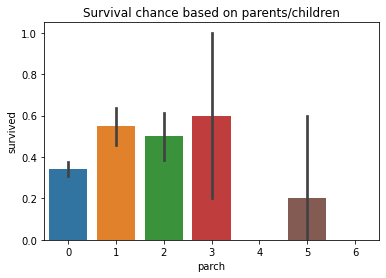

Parch 0 Survivors percentage =  34.365781710914455
Parch 0 Survivors percentage =  55.08474576271186
Parch 0 Survivors percentage =  50.0
Parch 0 Survivors percentage =  60.0


In [13]:
sns.barplot(x="parch", y="survived", data=titanic_data)
plt.title('Survival chance based on parents/children')
plt.show()
print("Parch 0 Survivors percentage = ", titanic_data["survived"][titanic_data["parch"] == 0].value_counts(normalize = True)[1]*100)
print("Parch 0 Survivors percentage = ", titanic_data["survived"][titanic_data["parch"] == 1].value_counts(normalize = True)[1]*100)
print("Parch 0 Survivors percentage = ", titanic_data["survived"][titanic_data["parch"] == 2].value_counts(normalize = True)[1]*100)
print("Parch 0 Survivors percentage = ", titanic_data["survived"][titanic_data["parch"] == 3].value_counts(normalize = True)[1]*100)


### Q7) Plot out the variation of survival and death amongst passengers of different age.

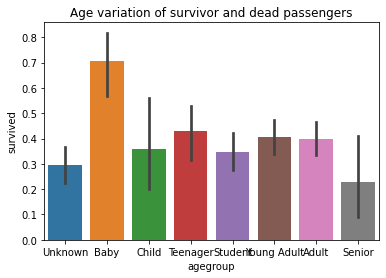

In [14]:
titanic_data["age"] = titanic_data["age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic_data['agegroup'] = pd.cut(titanic_data['age'], bins, labels = labels)
sns.barplot(x="agegroup", y="survived", data=titanic_data)
plt.title('Age variation of survivor and dead passengers')
plt.show()

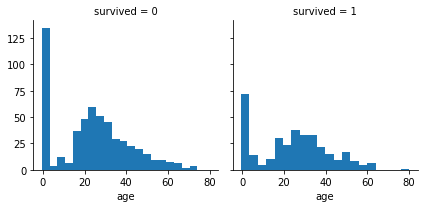

In [15]:
g = sns.FacetGrid(titanic_data, col='survived')
g.map(plt.hist, 'age', bins=20)

### Q8) Plot out the variation of survival and death with age amongst passengers of different passenger classes.

Age and Class variation of survivor and dead passengers


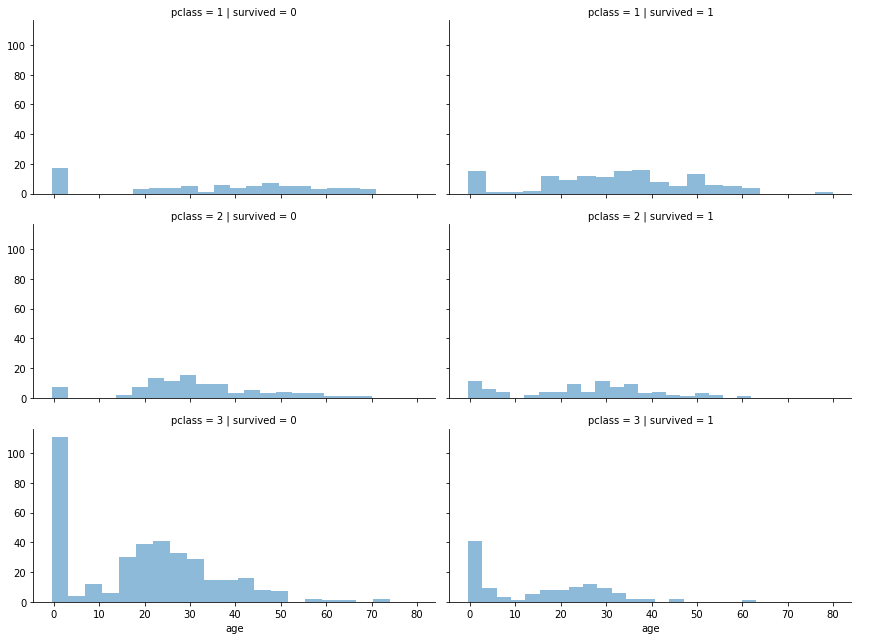

In [16]:
print("Age and Class variation of survivor and dead passengers")
grid = sns.FacetGrid(titanic_data, col='survived', row='pclass', size=3, aspect=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();


### Q9) Find out the survival probability for a Titanic passenger based on title from the name of passenger.

In [17]:
combine = [titanic_data, test_data]
for dataset in combine:
    dataset['Title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(titanic_data['Title'],titanic_data['sex'])

sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

titanic_data[['Title', 'survived']].groupby(['Title'], as_index=False).mean()

,Title,survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


### Q10) What conclusions are you derived from the analysis?
##### Please checkout the PDF file.